### How Much Is A Spy Worth In A Warring Riddler Nation?
***

The July 21st Riddler Classic from [FiveThirtyEight](https://fivethirtyeight.com/features/how-much-is-a-spy-worth-in-a-warring-riddler-nation/) is as follows: 

> There are two warlords: you and your archenemy, with whom you’re competing to conquer castles and collect the most victory points. Each of the 10 castles has its own strategic value for a would-be conqueror. Specifically, the castles are worth 1, 2, 3, … , 9 and 10 victory points. You and your enemy each have 100 soldiers to distribute between any of the 10 castles. Whoever sends more soldiers to a given castle conquers that castle and wins its victory points. (If you each send the same number of soldiers, you split the points.) Whoever ends up with the most points wins.

> But now, you have a spy! You know how many soldiers your archenemy will send to each castle. The bad news, though, is that you no longer have 100 soldiers — your army suffered some losses in a previous battle.

> What is the value of the spy?

> That is, how many soldiers do you need to have in order to win, no matter the distribution of your opponent’s soldiers? Put another way: What k is the minimum number such that, for any distribution of 100 soldiers in the 10 castles by your opponent, you can distribute k soldiers and win the battle?

This is an interesting problem because we're trying to plan an optimal attack plan for our own army, but because we're after an upper bound on the number of soldiers we'll ever need to win, we have to first plan an optimal attack plan for the enemy army. OK, we'll come back to this in a minute, but first let's get a feel for the general problem.   

In the most general sense we want to solve the following problem: 

- **Minimize** the number of soldiers deployed 
- **Subject to** the constraint that we still win the war

Note that there are $1 + 2 + \cdots + 10 = 55$ available victory points.  In order to win the war we need to win more than half of these, which means we need to win at minimum $28$ points.  

OK, let's look at a solution to the problem for a random allocation of the enemy's army.  (Don't worry for the moment how we actually find the solution.  We'll get back to that later.) In the following bar-chart the enemy forces allocated to each castle are represented by the grey bars, and our own forces are represented by the red bars.  


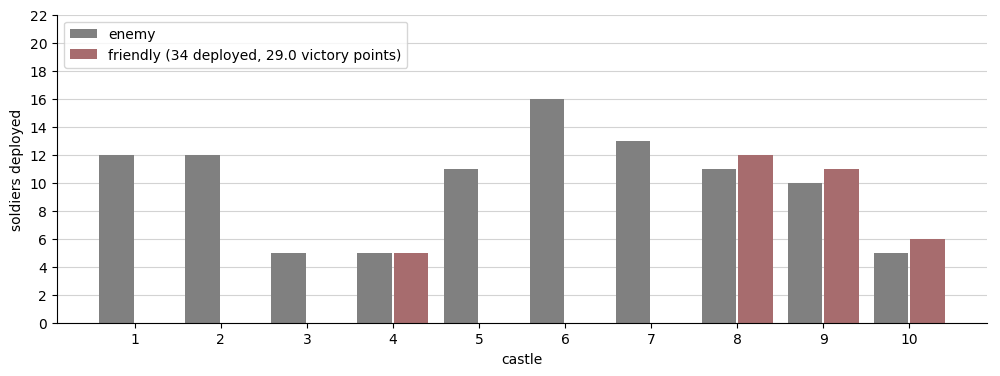

In [16]:
o = random_attack(10, 100, seed=1251)
w, d = battle_plan(o)
battle_report(o, w, d)

We see that in this example we were able to win a total of 29 victory points by deploying only 34 of our own soldiers.  There are a few interesting things to notice from this example: 

1. In some scenarios an optimal solution will involve securing more than the minimum 28 victory points.
2. In some scenarios (perhaps counterintuitively) a tie can be better than a win, even though it secures us fewer victory points. 
3. The optimal solution is not unique.  Notice that in this example we could have also won the war by allocating 5 soldiers to Castle 3 instead of Castle 4 (which would have given us 28.5 victory points, which is still above the 28 threshold)

OK, let's look at another random example. 

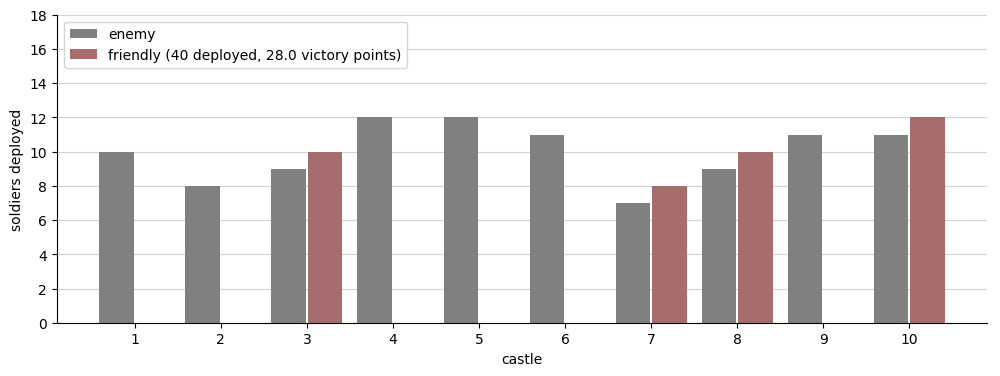

In [17]:
o = random_attack(10, 100, seed=1285)
w, d = battle_plan(o)
battle_report(o, w, d)

In this case we won the minimum 28 victory points by deploying 40 of our soldiers. Notice that unlike in the previous example, the optimal solution did not involve taking all of the top three most valuable castles.  Clearly something about the large number (11) of enemy soldiers in Castle 9 made it not worth expending enough soldiers to capture it.  

It would be nice if we could somehow quantify the value-cost relationship of taking a particular castle.  One way to do this would would be to look at the ratio of victory points that we could win versus the number of soldiers needed to take a particular castle.  We'll call this quantity the _utility_ of capturing a castle, and define it as 

$$
U(K) = \frac{\texttt{# victory points earned at Castle }K}{\texttt{# of soldiers required to capture Castle }K}
$$

The utility measure gives a sense of whether a particular castle has been under- or over-valued by the enemy army.  The idea then would be to design an attack strategy that capitalizes on the enemy army undervaluing certain castles, since these castles are likely to earn us more victory points at the expense of fewer soldiers.  The following chart shows the previous example with each castle's utility included in the graphic. 

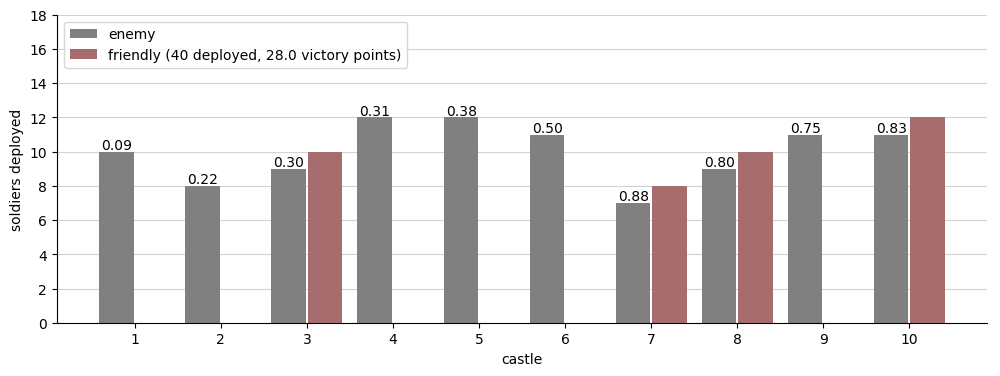

In [18]:
o = random_attack(10, 100, seed=1285)
w, d = battle_plan(o)
battle_report(o, w, d, show_utility=true)

Here we see that Castle 9 differed from Castles 7, 8, and 10 in that it had lower utility. Now, a couple of caveats to acknowledge.  This utility model ignores the value of earning a draw at a castle.  Also, the optimal solution will likely not involve capturing castles in order of highest utility.  Such a greedy approach ignores the fact that attempting to win close to 28 victory points (and not many more) will keep the number of required soldiers to a minimum.  Still, the utility model is good for building intuition. 

**A Worst-Case Scenario**: Now, the problem asks for the minimum number of soldiers needed to guarantee that we can win the war against any distribution of the enemy's forces.  To determine this worst-case scenario we need to design a best-case scenario from the perspective of the enemy's army.  Our utility model gives us a convenient way to think about this.  We should define an enemy attack plan that does not undervalue (or overvalue) any of the castles.  That is, we should pick a distribution where the utility measure is identical for each castle.  It turns out that allocating $2K-1$ soldiers to Castles $K=1,2,\ldots, 10$ gives a utility measure of $U(K) = 0.5$ for each castle.  

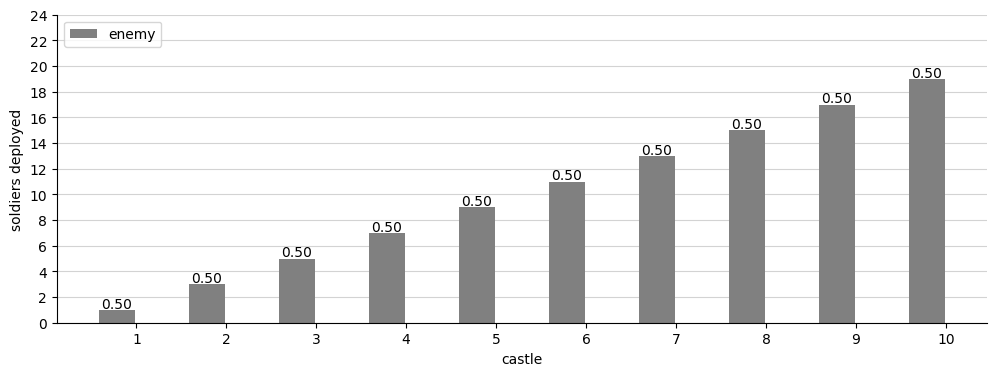

In [19]:
o = 2*collect(1:10)-1
w = zeros(Int64,10)
d = zeros(Int64,10)
battle_report(o, w, d, show_utility=true)

Now, one optimal attack plan for this worst-case scenario requires sending soldiers to capture Castles 1-7, earning us 28 victory points and requiring 56 soldiers. 

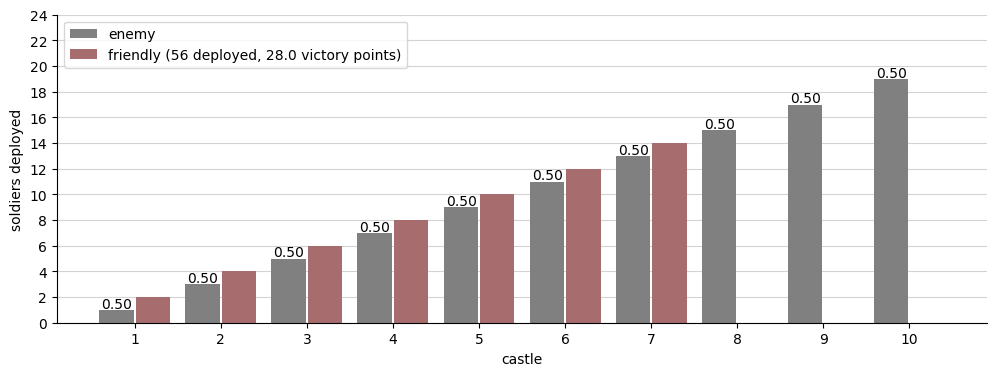

In [20]:
o = 2*collect(1:10)-1
w = [ones(7); zeros(3)]
battle_report(o, w, d, show_utility=true)

Again, such optimal solutions are not unique.  In fact, in this scenario, it's easy to check that capturing any combination of castles that earn us 28 victory points will also require expending 56 of our own soldiers.  

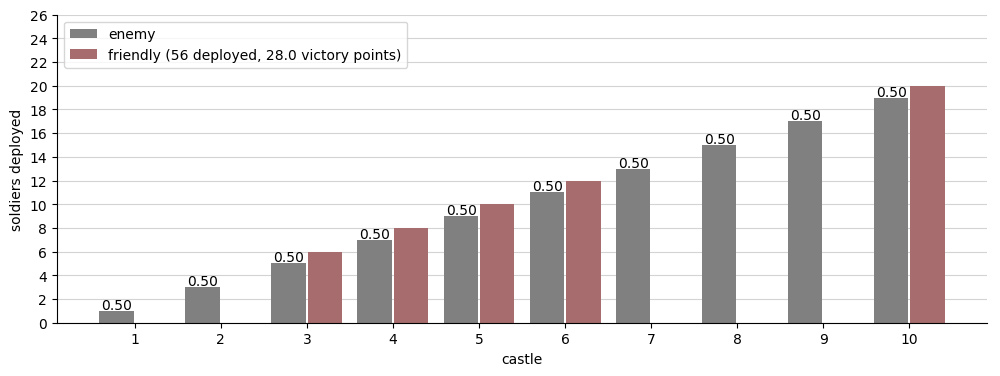

In [21]:
o = 2*collect(1:10)-1
w = [0,0,1,1,1,1,0,0,0,1]
battle_report(o, w, d, show_utility=true)

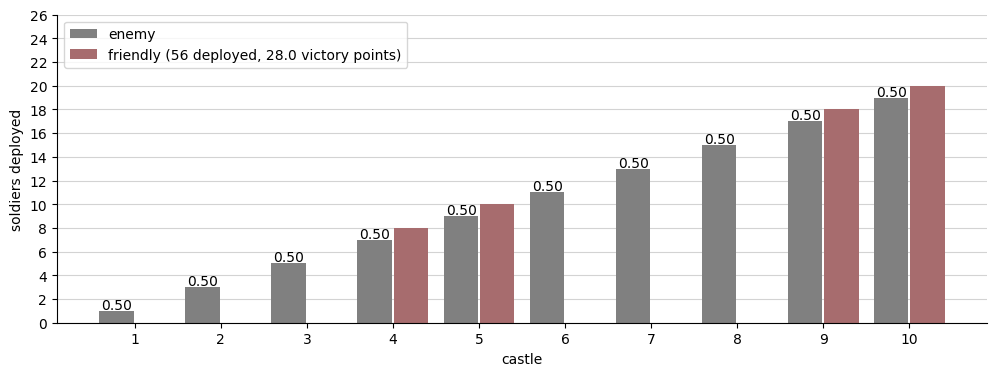

In [22]:
o = 2*collect(1:10)-1
w = [0,0,0,1,1,0,0,0,1,1]
battle_report(o, w, d, show_utility=true)

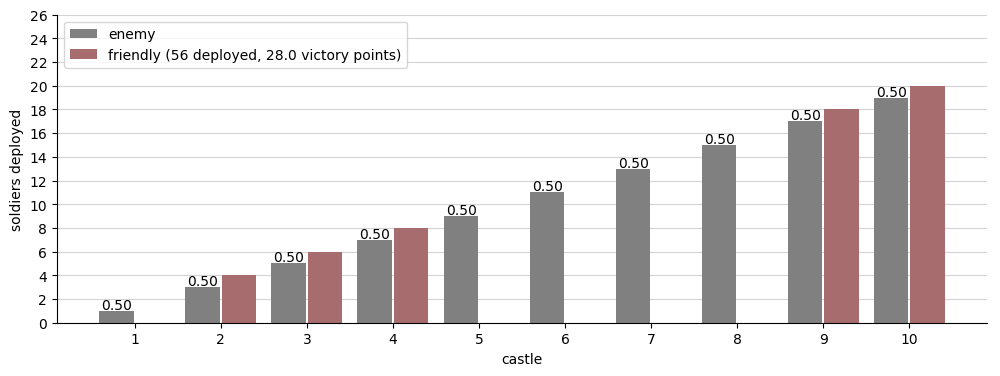

In [23]:
o = 2*collect(1:10)-1
w = [0,1,1,1,0,0,0,0,1,1]
battle_report(o, w, d, show_utility=true)

OK, let's go back to the first solution we considered for this worst-case scenario.  

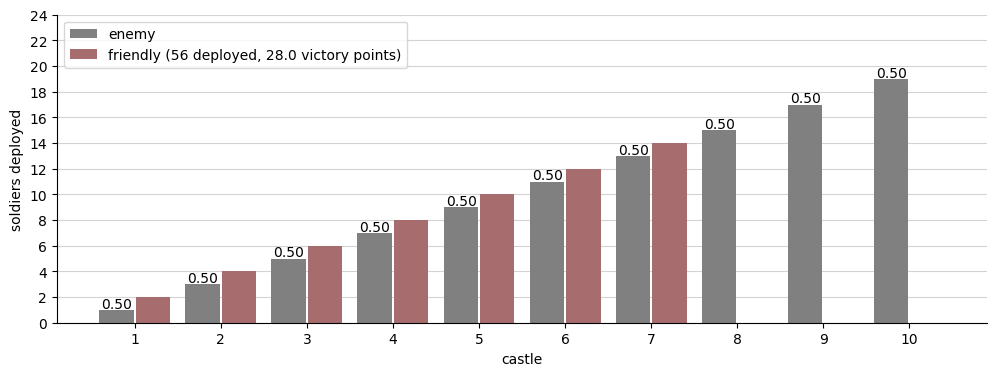

In [24]:
o = 2*collect(1:10)-1
w = [ones(7); zeros(3)]
battle_report(o, w, d, show_utility=true)

We should at least acknowledge that our contention that distributing the enemy army to ensure that all castles have equal utility _might_ not lead to the worst-case scenario of 56 deployed soldiers.  One way to do this is to consider starting from the proposed worst-case scenario, and the redistributing some of the enemy soldiers in an attempt to force us to deploy more soldiers. 

Hopefully it is clear that taking any solders from Castles 1-7 and adding them to Castles 8-10 would only make our solution better, since we would be able to reduce the number of soldiers allocated to some of Castles 1-7 and still earn our 28 victory points. As an example, the following scenario takes 1 enemy soldier from each of Castles 5-7 and sends them to Castle 8. Notice that from a utility-standpoint this undervalues Castles 5-7 (utility goes up) and overvalues Castle 8, which we're free to ignore. 

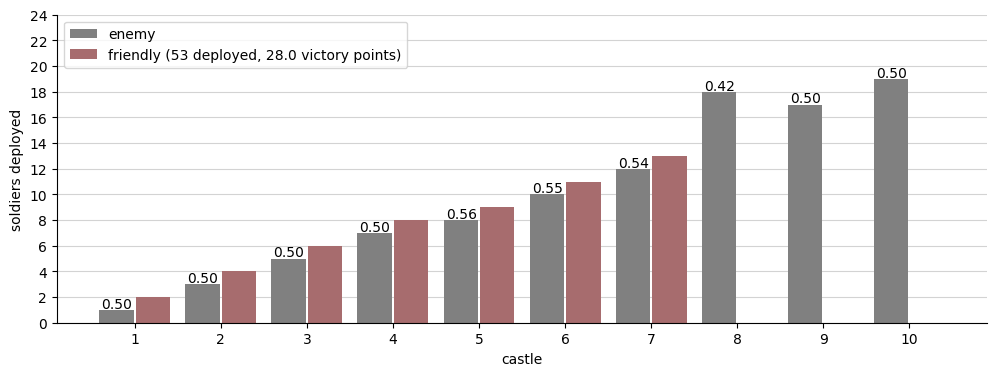

In [25]:
o = [1,3,5,7,8,10,12,18,17,19]
w = [ones(7); zeros(3)]
battle_report(o, w, d, show_utility=true)

A more promising modification would be to take some of the soldiers allocated to Castles 8-10 and redistribute them to Castles 1-7.  As an example, here we take 2 soldiers each from Castles 8 and 9 and 3 soldiers from Castle 10 and distribute them evenly to Castles 1-7. 



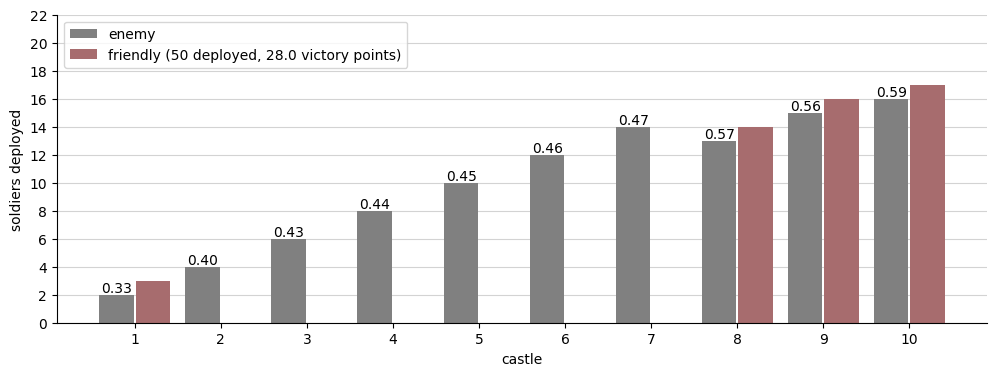

In [26]:
o = [2,4,6,8,10,12,14,13,15,16]
w, d = battle_plan(o)
battle_report(o, w, d, show_utility=true)

But in this case we see that the enemy has now undervalued Castles 8-10 and overvalued Castles 1-7, allowing us to easily win the war by taking Castles 8-10 (as well as Castle 1 to make 28 victory points) at a reduction to only 50 friendly soldiers deployed.  

Based on these experiments we conclude that the identical-utility scenario is, in fact, the worst-case scenario making the minimum number of soldiers required to defeat **any** enemy attack plan at most **56 Soldiers**.  


***

**Binary Linear Programming Approach**: In this section we outline the process of determining an optimal battle plan given the plans of the enemy forces.  

Remember that in the most general sense we want to solve the following problem: 

- **Minimize** the number of soldiers deployed 
- **Subject to** the constraint that we still win the war

And again note that there are $1 + 2 + \cdots + 10 = 55$ available victory points.  In order to win the war we need to win more than half of these, which means we need to win at minimum $28$ points.  

Now we need to decide how to best deploy our soldiers so that we obtained our minimum $28$ victory points, while not expending more soldiers than necessary.  When considering how to approach a particular castle it should be clear that in order to not waste soldiers there are three possible actions. We can  

1. **lose** the castle by deploying no soldiers whatsoever  
1. **win** the castle by deploying one more soldier than the enemy 
1. **draw** the castle by deploying exactly the same number of soldiers as the enemy 

Let $o_K$ be the number of soldiers deployed to Castle $K$ by the enemy.  Let $w_K \in \{0,1\}$ be a binary variable that indicates whether we decide to win Castle $K$.  Finally, let $d_K \in \{0,1\}$ be a binary variable that indicates whether we decide to draw Castle $K$.  Our entire strategy is then defined by our choice of the variables $w_1, \ldots, w_{10}$ and $d_1, \ldots, d_{10}$.   

With this notation in hand we can write down the total number of soldiers we expend by employing a particular strategy.  We have  

$$
C(w_1,\ldots,w_{10},d_1,\ldots,d_{10}) = w_1(o_1 + 1) + \cdots + w_{10}(o_{10}+1) + d_1o_1 + \cdots + d_{10}o_{10} = \sum_{K=1}^{10} w_K(o_K+1) + d_Ko_K 
$$

where here we should also enforce the constraint that if $w_K = 1$ then $d_K = 0$ (and vice versa) since it makes no sense to both win and draw the same castle. 

Next we formulate the constraint that we must win the war.  Since winning Castle $K$ nets us $K$ victory points, and drawing Castle $K$ nets us $K/2$ victory points, we have the constraint  

$$
V(w_1,\ldots,w_{10},d_1,\ldots,d_{10}) = 1\cdot w_1 + 2\cdot w_2 + \cdots + 10\cdot w_{10} + \frac{1}{2}d_1 + \frac{2}{2} d_2 + \cdots + \frac{10}{2}d_{10} = \sum_{K=1}^{10} Kw_K + \frac{1}{2}Kd_K \geq 28 
$$

Finally, we should formalize the restriction that $w_K$ and $d_K$ cannot be activated at the same time.  Since we are treating the $w$'s and $d$'s as binary values, we can enforce this constraint as 

$$
w_K + d_K \leq 1 
$$

OK, so given the data $\{o_K\}_{K=1}^{10}$ we can write down the binary linear program for the optimal attack plan. We have 

$$
\begin{eqnarray}
\textrm{minimize } ~~ C({\bf w}, {\bf d}) &=& \sum_{K=1}^{10} w_K(o_K + 1) + d_Ko_K \\ 
\textrm{subject to }~~~~~~ V({\bf w}) &=& \sum_{K=1}^{10} K~w_K + \frac{1}{2}K~d_K \geq 28 \\
&& w_K + d_K \leq 1 \textrm{ for } K=1, \ldots, 10
\end{eqnarray}
$$

Such problems are nontrivial to solve by hand, so we'll off-load the work to [Julia](https://julialang.org/)'s Mathematical Optimization Package ([JuMP](https://github.com/JuliaOpt/JuMP.jl)). 

The function $\texttt{battle_plan()}$ displayed below formulates and solves the binary linear program in JuMP and returns the optimal binary vectors ${\bf w}$ and ${\bf d}$.


<br>

### Helper Functions
***

In [27]:
using JuMP, Cbc, PyPlot, Distributions 

In [ ]:
function random_attack(nc::Int64, ns::Int64; seed=nothing)
    # ---------------------------------------------
    # Function to randomly distribute enemy 
    # forces' soldiers to castles 
    # ---------------------------------------------
    
    # Check if random seed has been specified 
    if !isnull(seed) 
        srand(seed)
    end
    
    # Initialize DiscreteUniform distribution
    unif = DiscreteUniform(1, nc)
    
    # Randomly distribute each soldier 
    o = zeros(Int64, nc)
    for ii=1:ns
        o[(rand(unif))] += 1
    end
    
    return o
    
end

function battle_plan(o::Array{Int64,1}; report=false, show_model=false)
    # ---------------------------------------------------
    # Function to construct and solve the Binary Linear
    # Program. report=true gives graphical battle report
    # ---------------------------------------------------
    
    # Define JuMP model 
    m = Model(solver = CbcSolver())
    
    # Binary variables indicating whether to 
    # win or draw a castle 
    @variable(m, w[1:length(o)], Bin)
    @variable(m, d[1:length(o)], Bin)
    
    # Minimize number of troops deployed 
    @objective(m, Min, dot(w,o+1) + dot(d,o))
    
    # Subject to constraint that we win the war
    @constraint(m, dot(collect(1:length(o)),w) + .5*dot(collect(1:length(o)),d) >= 28)
    
    # Subject to constraint that we do not 
    # both win and draw a castle 
    for ii=1:length(o)
        @constraint(m, w[ii]+d[ii] <= 1)
    end
    
    # Optional print form of Binary Linear Program  
    if show_model 
        println("JuMP Model:\n")
        print(m)
        println("\n")
    end

    # Solve the Binary Linear Program  
    status = solve(m)

    # Optional graphical battle report 
    if report 
        battle_report(o, getvalue(w), getvalue(d))
    end
    
    # Return total troop expendature 
    #return getobjectivevalue(m)
    return getvalue(w), getvalue(d)
    
    
end

function battle_report(o::AbstractArray, w::AbstractArray, d::AbstractArray; show_utility=false)
    # ---------------------------------------------------
    # Function to plot graphical battle report 
    # ---------------------------------------------------
    
    # User-defined colors 
    mycolors = Dict("green"=>"#6a9373","red"=>"#a76c6e","blue"=>"#657897")

    # Get number of castles 
    nc = length(o)
    
    # Set x-positions of bars 
    opx = collect(1:10)-0.2125
    frx = opx + .425 
    
    # Set heights of bars 
    opd = o 
    frd =  [w[c]*(o[c]+1) + d[c]*o[c] for c=1:nc]
    
    # Set colors of bars
    opc = ["gray" for c=1:nc]
    frc = [mycolors["red"] for c=1:nc]
    
    # Get total forces deployed and victory points
    deployed = Int(sum(frd))
    vpts = sum([c*w[c] + 0.5*c*d[c] for c=1:nc])
    
    # Plot bars 
    bar(opx, opd, width=0.4, color=opc, label="enemy")
    if sum(w) + sum(d) > 0 
        bar(frx, frd, width=0.4, color=frc, label=string("friendly (",deployed," deployed, ", vpts, " victory points)"))
    end
    
    # Set x and y-ticks 
    xticks(collect(1:10))
    yticks(collect(0:2:maximum([maximum(frd),maximum(opd)])+6))
    
    # Set figure size 
    fig = gcf(); fig[:set_size_inches](12, 4)
    
    # Set legend location
    legend(loc="upper left")
    
    # Set axis labels 
    xlabel("castle")
    ylabel("soldiers deployed")
    
    # Turn off top and right spines 
    ax = gca()
    ax[:spines]["top"][:set_visible](false) # Hide the top edge of the axis
    ax[:spines]["right"][:set_visible](false) # Hide the top edge of the axis

    # Set background color to white and gridlines to gray 
    ax[:yaxis][:grid]("True", color="lightgray")
    ax[:set_axisbelow]("True")
    
    if show_utility
        for c=1:length(o)
            U = Float64(c)/(o[c]+1)
            util_str = @sprintf "%2.2f" U
            text(opx[c]-.175, opd[c]+0.15, util_str, rotation="horizontal")
        end
    end
    
end
